     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


C:\Users\User\AppData\Local\Temp\ipykernel_19364\2356271558.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=data, palette='viridis')


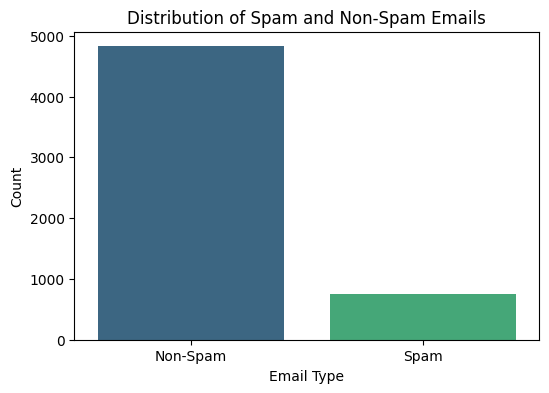

Accuracy: 0.968609865470852
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



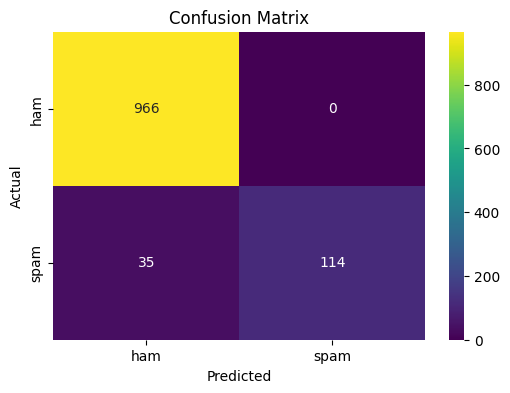

C:\Users\User\AppData\Local\Temp\ipykernel_19364\2356271558.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spam_feature_log_prob[top_features_idx], y=feature_names[top_features_idx], palette='viridis')


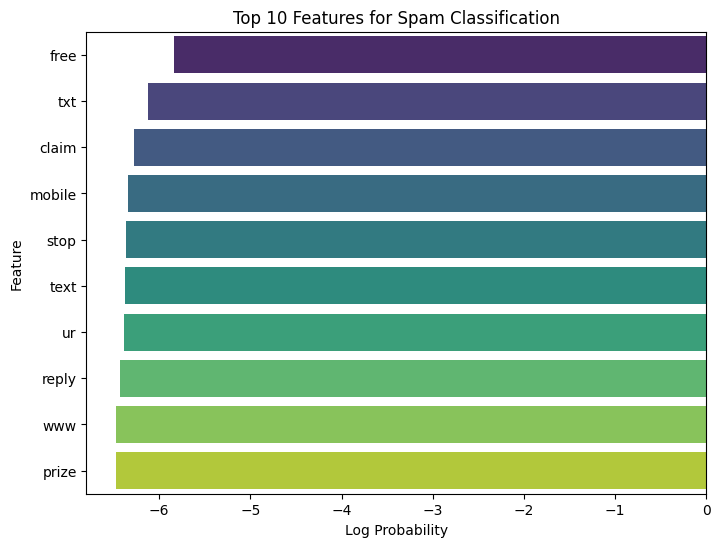

                                                   Text Predicted Label  \
2826  Oh right, ok. I'll make sure that i do loads o...             ham   
3695                     I am in tirupur.  call you da.             ham   
3906             No that just means you have a fat head             ham   
575   You have won ?1,000 cash or a ?2,000 prize! To...            spam   
2899  Come aftr  &lt;DECIMAL&gt; ..now i m cleaning ...             ham   
3456  Friendship poem: Dear O Dear U R Not Near But ...             ham   
5128  Wot about on wed nite I am 3 then but only til 9!             ham   
919               Dont talk to him ever ok its my word.             ham   
2505               Congrats kano..whr s the treat maga?             ham   
17    Eh u remember how 2 spell his name... Yes i di...             ham   

     Actual Label  
2826          ham  
3695          ham  
3906          ham  
575          spam  
2899          ham  
3456          ham  
5128          ham  
919           

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_excel(r'../data/Spam_Email_Detection.xlsx')

# Display the first few rows of the dataset
print(data.head())

# Clean the dataset by selecting only the relevant columns
data = data[['v1', 'v2']]
data.columns = ['Label', 'Text']

# Convert all non-string entries in the Text column to strings
data['Text'] = data['Text'].astype(str)

# Encode the labels
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Plot the distribution of spam and non-spam emails
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=data, palette='viridis')
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['Text'], data['Label'], test_size=0.2, random_state=42, stratify=data['Label']
)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Decode the predicted labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the most important features for classification
feature_names = tfidf_vectorizer.get_feature_names_out()
spam_feature_log_prob = model.feature_log_prob_[1]
top_features_idx = spam_feature_log_prob.argsort()[-10:][::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=spam_feature_log_prob[top_features_idx], y=feature_names[top_features_idx], palette='viridis')
plt.title('Top 10 Features for Spam Classification')
plt.xlabel('Log Probability')
plt.ylabel('Feature')
plt.show()

# Display sample predictions
sample_results = pd.DataFrame({
    'Text': X_test,
    'Predicted Label': y_pred_labels,
    'Actual Label': y_test_labels
}).head(10)  # Display the first 10 predictions for example

print(sample_results)
